## Cartpole RL Model

### GPU CHECK


In [26]:
import torch
print("CUDA Kullanılabilir mi?", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Kullanılan GPU:", torch.cuda.get_device_name(0))

CUDA Kullanılabilir mi? True
Kullanılan GPU: NVIDIA GeForce RTX 4060 Laptop GPU


### QUICK MODEL TEST

Test Eğitimi Başlıyor...
Episode 1/100, Total Reward: 14.0, Length: 14
Episode 2/100, Total Reward: 10.0, Length: 10
Episode 3/100, Total Reward: 32.0, Length: 32
Episode 4/100, Total Reward: 31.0, Length: 31
Episode 5/100, Total Reward: 12.0, Length: 12
Episode 6/100, Total Reward: 12.0, Length: 12
Episode 7/100, Total Reward: 15.0, Length: 15
Episode 8/100, Total Reward: 23.0, Length: 23
Episode 9/100, Total Reward: 15.0, Length: 15
Episode 10/100, Total Reward: 14.0, Length: 14
Episode 11/100, Total Reward: 31.0, Length: 31
Episode 12/100, Total Reward: 23.0, Length: 23
Episode 13/100, Total Reward: 10.0, Length: 10
Episode 14/100, Total Reward: 24.0, Length: 24
Episode 15/100, Total Reward: 12.0, Length: 12
Episode 16/100, Total Reward: 19.0, Length: 19
Episode 17/100, Total Reward: 19.0, Length: 19
Episode 18/100, Total Reward: 30.0, Length: 30
Episode 19/100, Total Reward: 13.0, Length: 13
Episode 20/100, Total Reward: 27.0, Length: 27
Episode 21/100, Total Reward: 10.0, Length: 

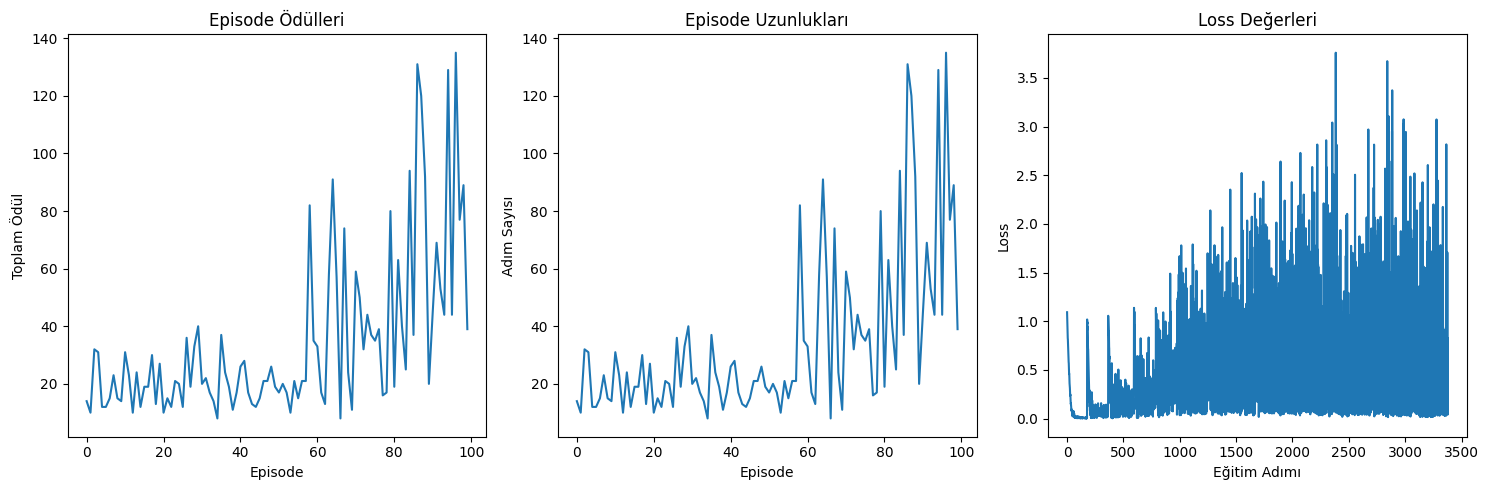


Son 10 episode ortalama ödül: 72.40

Test başarılı! Tam eğitime geçebilirsiniz.


In [23]:
import os
import sys
sys.path.append('..')

from src.train import train_model
import matplotlib.pyplot as plt

# Proje kök dizinini bul
project_root = os.path.dirname(os.getcwd())
models_path = os.path.join(project_root, 'models')
print("Test Eğitimi Başlıyor...")
# Kısa bir test eğitimi yapalım
metrics = train_model(episodes=100, batch_size=32)  # Daha az episode ve küçük batch size

# Metrikleri görselleştir
plt.figure(figsize=(15, 5))

# Episode Ödülleri
plt.subplot(1, 3, 1)
plt.plot(metrics.episode_rewards)
plt.title('Episode Ödülleri')
plt.xlabel('Episode')
plt.ylabel('Toplam Ödül')

# Episode Uzunlukları
plt.subplot(1, 3, 2)
plt.plot(metrics.episode_lengths)
plt.title('Episode Uzunlukları')
plt.xlabel('Episode')
plt.ylabel('Adım Sayısı')

# Loss Değerleri
plt.subplot(1, 3, 3)
plt.plot(metrics.losses)
plt.title('Loss Değerleri')
plt.xlabel('Eğitim Adımı')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Performans değerlendirmesi
son_10_ortalama = sum(metrics.episode_rewards[-10:]) / 10
print(f"\nSon 10 episode ortalama ödül: {son_10_ortalama:.2f}")

if son_10_ortalama > 50:  # Test için daha düşük bir eşik
    print("\nTest başarılı! Tam eğitime geçebilirsiniz.")
else:
    print("\nTest başarısız. Parametreleri kontrol edin.")

### TRAIN

Tam Eğitim Başlıyor...
Episode 1/1000, Total Reward: 24.0, Length: 24
Episode 2/1000, Total Reward: 17.0, Length: 17
Episode 3/1000, Total Reward: 19.0, Length: 19
Episode 4/1000, Total Reward: 26.0, Length: 26
Episode 5/1000, Total Reward: 17.0, Length: 17
Episode 6/1000, Total Reward: 11.0, Length: 11
Episode 7/1000, Total Reward: 24.0, Length: 24
Episode 8/1000, Total Reward: 12.0, Length: 12
Episode 9/1000, Total Reward: 19.0, Length: 19
Episode 10/1000, Total Reward: 17.0, Length: 17
Episode 11/1000, Total Reward: 14.0, Length: 14
Episode 12/1000, Total Reward: 72.0, Length: 72
Episode 13/1000, Total Reward: 20.0, Length: 20
Episode 14/1000, Total Reward: 15.0, Length: 15
Episode 15/1000, Total Reward: 18.0, Length: 18
Episode 16/1000, Total Reward: 17.0, Length: 17
Episode 17/1000, Total Reward: 22.0, Length: 22
Episode 18/1000, Total Reward: 22.0, Length: 22
Episode 19/1000, Total Reward: 23.0, Length: 23
Episode 20/1000, Total Reward: 22.0, Length: 22
Episode 21/1000, Total Rew

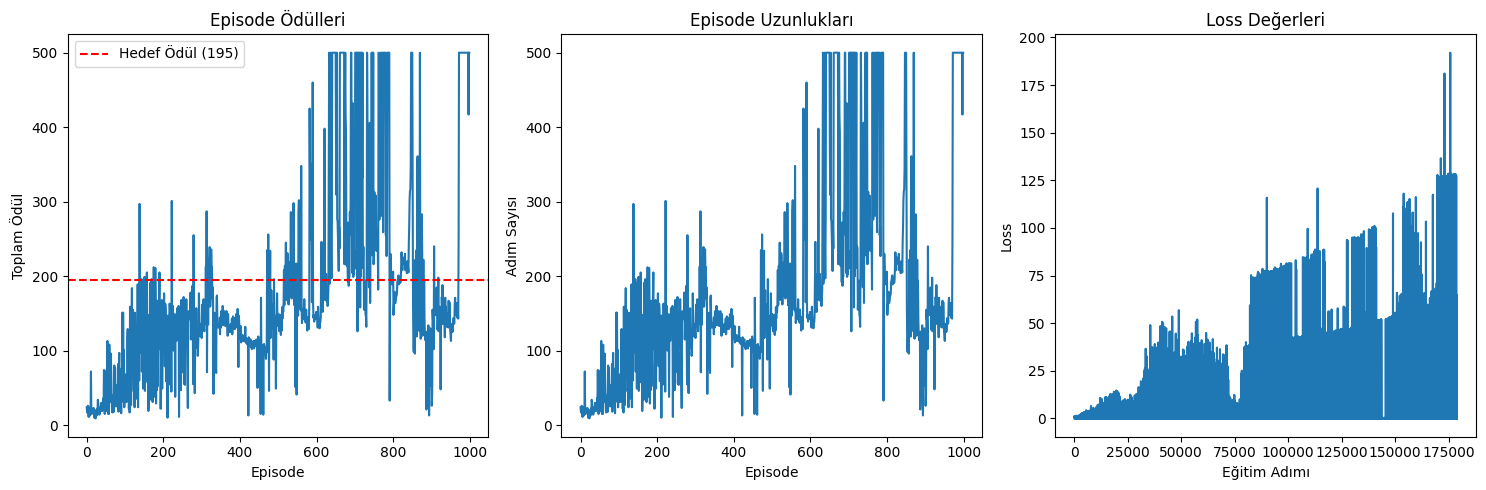


Performans Metrikleri:
Son 100 Episode Ortalama Ödül: 243.41
Son 10 Episode Ortalama Ödül: 491.70
En Yüksek Ödül: 500.0

Model başarıyla eğitildi! CartPole problemi çözüldü!


In [24]:
import os
import sys
sys.path.append('..')

from src.train import train_model
import matplotlib.pyplot as plt
import time

# Proje kök dizinini bul
project_root = os.path.dirname(os.getcwd())
models_path = os.path.join(project_root, 'models')

print("Tam Eğitim Başlıyor...")
start_time = time.time()

# Tam eğitim parametreleri
metrics = train_model(
    episodes=1000,     # Episode sayısını artırdık
    batch_size=64     # Batch size aynı kaldı
)

# Eğitim süresini hesapla
training_time = time.time() - start_time
print(f"\nEğitim tamamlandı! Toplam süre: {training_time/60:.2f} dakika")

# Metrikleri görselleştir
plt.figure(figsize=(15, 5))

# Episode Ödülleri
plt.subplot(1, 3, 1)
plt.plot(metrics.episode_rewards)
plt.title('Episode Ödülleri')
plt.xlabel('Episode')
plt.ylabel('Toplam Ödül')
plt.axhline(y=195, color='r', linestyle='--', label='Hedef Ödül (195)')
plt.legend()

# Episode Uzunlukları
plt.subplot(1, 3, 2)
plt.plot(metrics.episode_lengths)
plt.title('Episode Uzunlukları')
plt.xlabel('Episode')
plt.ylabel('Adım Sayısı')

# Loss Değerleri
plt.subplot(1, 3, 3)
plt.plot(metrics.losses)
plt.title('Loss Değerleri')
plt.xlabel('Eğitim Adımı')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Detaylı performans analizi
son_100_ortalama = sum(metrics.episode_rewards[-100:]) / 100
son_10_ortalama = sum(metrics.episode_rewards[-10:]) / 10
max_reward = max(metrics.episode_rewards)

print("\nPerformans Metrikleri:")
print(f"Son 100 Episode Ortalama Ödül: {son_100_ortalama:.2f}")
print(f"Son 10 Episode Ortalama Ödül: {son_10_ortalama:.2f}")
print(f"En Yüksek Ödül: {max_reward}")

if son_100_ortalama > 195:
    print("\nModel başarıyla eğitildi! CartPole problemi çözüldü!")
elif son_100_ortalama > 150:
    print("\nModel iyi performans gösteriyor, ama hala iyileştirilebilir.")
else:
    print("\nModel henüz istenen performansa ulaşamadı.")

# Eğitim sürecini kaydet
data_path = os.path.join(project_root, 'data')
os.makedirs(data_path, exist_ok=True)  # data klasörünü oluştur

with open(os.path.join(data_path, 'training_results.txt'), 'w') as f:
    f.write(f"Eğitim Süresi: {training_time/60:.2f} dakika\n")
    f.write(f"Son 100 Episode Ortalama: {son_100_ortalama:.2f}\n")
    f.write(f"Son 10 Episode Ortalama: {son_10_ortalama:.2f}\n")
    f.write(f"En Yüksek Ödül: {max_reward}\n")
    
# Detaylı metrikleri kaydet
import json
metrics_data = {
    'episode_rewards': metrics.episode_rewards,
    'episode_lengths': metrics.episode_lengths,
    'losses': metrics.losses
}
with open(os.path.join(data_path, 'training_metrics.json'), 'w') as f:
    json.dump(metrics_data, f)

### TEST

In [25]:
# Test için gerekli importlar
import os
from src.environment import create_environment
import torch
from time import sleep

# Proje kök dizinini bul (notebooks klasöründen bir üst dizine çık)
project_root = os.path.dirname(os.getcwd())
models_path = os.path.join(project_root, 'models')

print(f"Model dosyası aranıyor: {os.path.join(models_path, 'trained_model.pth')}")

# Ortamı ve modeli hazırla
env = create_environment("CartPole-v1")
model = torch.load(os.path.join(models_path, 'trained_model.pth'), weights_only=False)  # weights_only=False kullanıyoruz
model.eval()

test_results = []
for episode in range(5):
    state, _ = env.reset()
    total_reward = 0
    terminated = truncated = False
    
    while not (terminated or truncated):
        action = torch.argmax(model(torch.tensor(state, dtype=torch.float32))).item()
        state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        env.render()
        sleep(0.02)
    
    test_results.append(total_reward)
    print(f"Test Episode {episode + 1} Total Reward: {total_reward}")

print(f"\nTest Ortalama Ödül: {sum(test_results)/len(test_results):.2f}")
print(f"Test En Yüksek Ödül: {max(test_results)}")

env.close()

Model dosyası aranıyor: /home/mfati/cuda_projects/cartpole_rl_cuda/models/trained_model.pth
Test Episode 1 Total Reward: 500.0
Test Episode 2 Total Reward: 500.0
Test Episode 3 Total Reward: 500.0
Test Episode 4 Total Reward: 500.0
Test Episode 5 Total Reward: 500.0

Test Ortalama Ödül: 500.00
Test En Yüksek Ödül: 500.0
